<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+2><b> АНАЛИЗ УБЫТКОВ ПРИЛОЖЕНИЯ ProcrastinatePRO+ </b></font>

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

<font size=+2><b> ПЛАН РАБОТЫ. </b></font>

<font size=+1><b> 0. Загрузка данных. </b></font>
 
<font size=+1><b> 1. Предобработка данных. </b></font>

<font size=+1><b> 2. Функции для расчёта RR, CR, LTV, ROI. </b></font>

Разрешается использовать функции get_profiles(), get_retention(), get_conversion(), get_ltv(), а также plot_retention(), plot_conversion() и plot_ltv_roi(), с которыми вы познакомились в теоретических уроках.

<font size=+1><b> 3. Исследовательский анализ данных. </b></font>

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства
- Рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Напишите промежуточные выводы.

<font size=+1><b> 4. Маркетинг. </b></font>

Выясните:

- Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени.
- Узнайте, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитайте средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используйте профили пользователей.

Напишите промежуточные выводы.

<font size=+1><b> 5. Анализ окупаемости рекламы. </b></font>

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте общую окупаемость рекламы. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.    
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.    
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.    
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.    
Опишите обнаруженные проблемы и напишите промежуточные выводы.    
- Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Ответьте на такие вопросы:    
Окупается ли реклама в целом?    
Какие устройства, страны и каналы могут снижать окупаемость рекламы?    
Чем могут быть вызваны проблемы окупаемости?    
Опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.    

<font size=+1><b> 6. Выводы. </b></font>

- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.
    
</div>

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+2><b> 0. ЗАГРУЗКА ДАННЫХ </b></font>

<font size=+1><b> 0.1. Структура данных. </b></font>

Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день
    
<font size=+1><b> 0.2. Загрузка данных и общая информация. </b></font>    
    
<div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

In [3]:
visits.info()
print()

orders.info()
print()

costs.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column 

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+2><b> 1. ПРЕДОБРАБОТКА ДАННЫХ. </b></font>

<font size=+1><b> 1.1. Поиск пропущенных значений. </b></font>

Сразу отметим что пропущенных значений в трёх датасетах нет.

<font size=+1><b> 1.2. Изменение типа данных. </b></font>

Необходимы изменения в типах всех данных, связанных с датами. Кроме того, следует перевести user_id в двух ДС к 'object'. Также приведём все названия столбцов к змеиному регистру.
    
<div>

In [4]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

visits = visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})

visits['user_id'] = visits['user_id'].astype('object')
orders['user_id'] = orders['user_id'].astype('object')

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [5]:
visits.info()
print()

orders.info()
print()

costs.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  object        
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  object        
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 942.6+ KB

<

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 1.3. Поиск дубликатов. </b></font>

Осуществим поиск дубликатов в датасетах: явных и неявных (в тех столбцах, где это имеет смысл).

И явных, и неявных дубликатов нигде не обнаружено.
    
<div>

In [6]:
print('Количество явных дубликатов в visits:', visits.duplicated().sum(), '\n')
print('Количество явных дубликатов в orders:', orders.duplicated().sum(), '\n')
print('Количество явных дубликатов в costs:', costs.duplicated().sum())

Количество явных дубликатов в visits: 0 

Количество явных дубликатов в orders: 0 

Количество явных дубликатов в costs: 0


In [7]:
print('Уникальные значения в region:', visits.sort_values(by='region')['region'].unique(), '\n')

print('Уникальные значения в device:', visits.sort_values(by='device')['device'].unique(), '\n')

print('Уникальные значения в channel (датасет visits):', visits.sort_values(by='channel')['channel'].unique(), '\n')

print('Уникальные значения в channel (датасет costs):', costs.sort_values(by='channel')['channel'].unique())

Уникальные значения в region: ['France' 'Germany' 'UK' 'United States'] 

Уникальные значения в device: ['Android' 'Mac' 'PC' 'iPhone'] 

Уникальные значения в channel (датасет visits): ['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic'] 

Уникальные значения в channel (датасет costs): ['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds']


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 1.4. Поиск аномальных данных. </b></font>

Рассмотрим датасеты на наличие аномальных значений. Начнем с данных, ссвязанных с датами: рассмотрим все, кроме visits['session_ens'] - так как этот столбец напрямую связан с  visits['session_start'].
    
 <div>

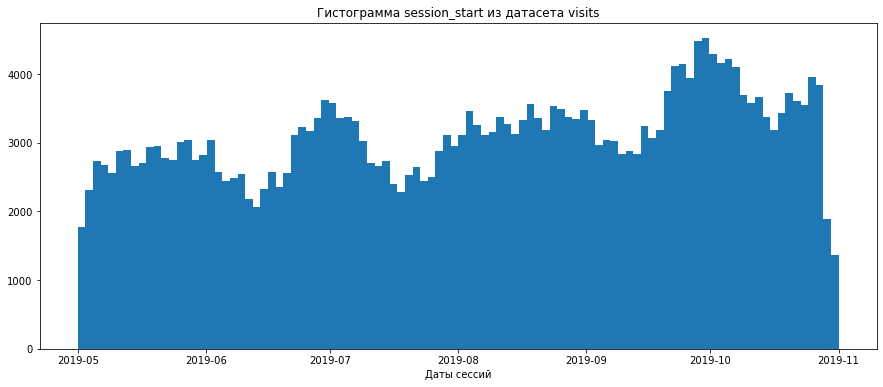

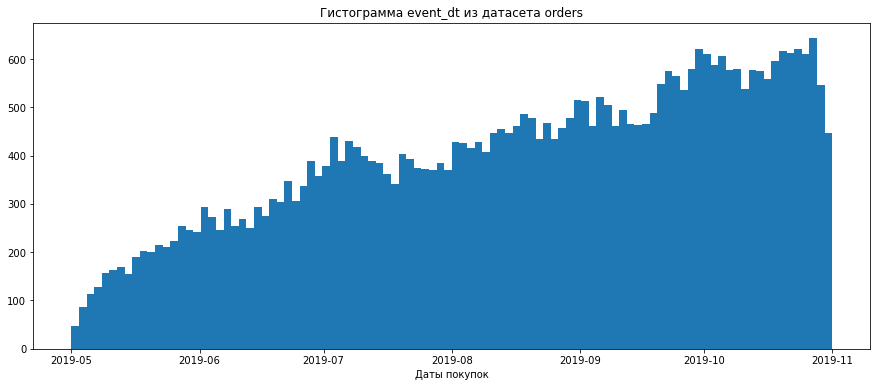

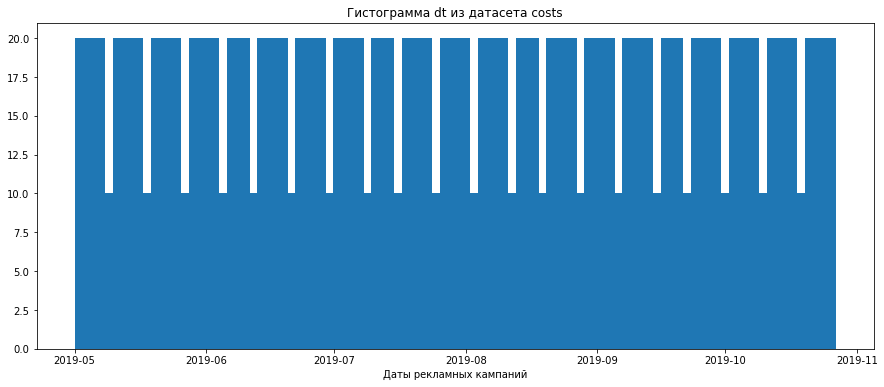

In [8]:
plt.figure(figsize=(15, 6))
plt.hist(visits['session_start'], bins=100)
plt.xlabel('Даты сессий')
plt.title('Гистограмма session_start из датасета visits')
plt.show()

plt.figure(figsize=(15, 6))
plt.hist(orders['event_dt'], bins=100)
plt.xlabel('Даты покупок')
plt.title('Гистограмма event_dt из датасета orders')
plt.show()

plt.figure(figsize=(15, 6))
plt.hist(costs['dt'], bins=100)
plt.xlabel('Даты рекламных кампаний')
plt.title('Гистограмма dt из датасета costs')
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 1.4. Поиск аномальных данных (продолжение). </b></font>

Данные visits['session_start'] характеризуются взлётами и падениями количества datetim'ов пользовательский сессий, но мне они не кажутся аномально распределёнными.

Распределение данных orders['event_dt'] явно "скошено" вправо, что логично: "накопленный" эффект рекламных компаний приводит к росут количества заказов.

Распреление данных costs['dt'] (дат рекламных кампаний) довольно интересно: каждая из 100 "корзин" соотвествует либо числу 10, либо 20. Мне кажется это можно объяснить тем, что характер запуска рекламных кампания неслучаен - в какой-то момент их запускали в меньшем количестве, в какой-то - в большем.

Рассмотрим теперь распределение данных выручки (с одного заказа) orders['revenue'].
    
<div>

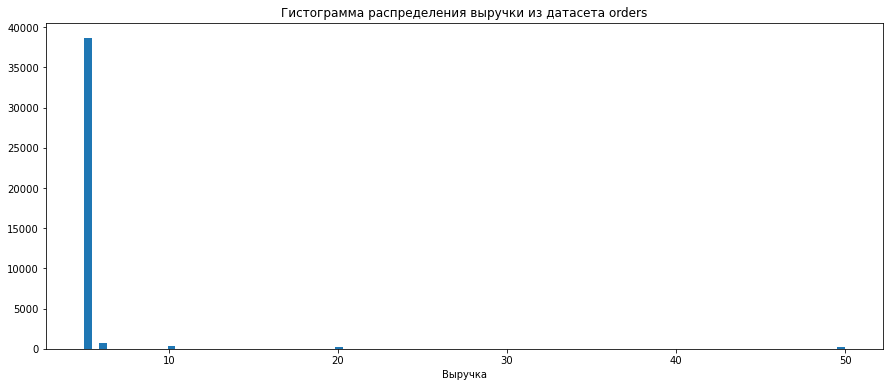

In [9]:
plt.figure(figsize=(15, 6))
plt.hist(orders['revenue'], bins=100)
plt.xlabel('Выручка')
plt.title('Гистограмма распределения выручки из датасета orders')
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 1.4. Поиск аномальных данных (продолжение). </b></font>

Распреление выручки весьма любопытно: есть некоторое небольшое количество "дорогих" заказов. Рассмотрим подробнее с помощью value_counts.
    
<div>

In [10]:
orders.query('revenue > 10').value_counts('revenue')

revenue
49.99    212
19.99    204
dtype: int64

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 1.4. Поиск аномальных данных (продолжение). </b></font>

Выбивающиеся значения выручки равны 19.99 и 49.99, что очень похоже на цены в магазине приложений. Таким образом, оставим эти значения в датасете.

Напоследок рассмотрим значения costs['costs'] - стоимости рекламных кампаний.
    
<div>

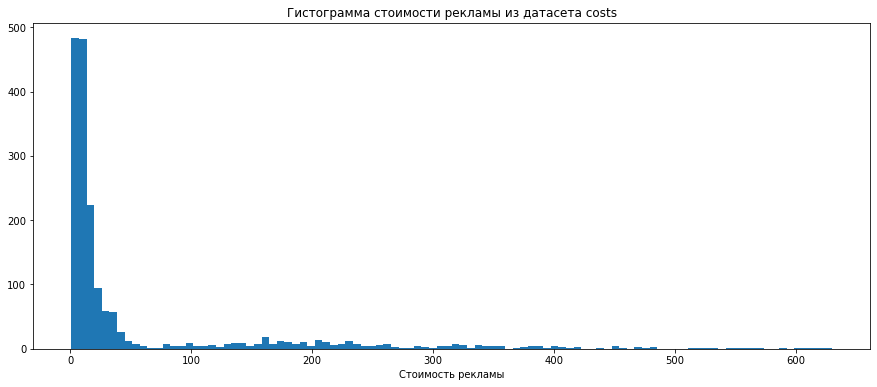

In [11]:
plt.figure(figsize=(15, 6))
plt.hist(costs['costs'], bins=100)
plt.xlabel('Стоимость рекламы')
plt.title('Гистограмма стоимости рекламы из датасета costs')
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 1.4. Поиск аномальных данных (продолжение). </b></font>

Распределение стоимости рекламных кампаний также довольно любопытно: очень много "дешёвых" кампаний и мало - "дорогих". Возможно, это связано со спецификой каждого рекламного агенства. Рассмотрим сводную таблицу, сгруппированную по агентству.
    
<div>

In [12]:
costs.groupby('channel', sort=False).agg({'costs': ['min', 'max', 'median']})

costs                  
                      min      max   median
channel                                    
FaceBoom            78.10  299.200  178.200
MediaTornado         1.92   11.520    5.280
RocketSuperAds       2.73   27.495    8.645
TipTop              46.00  630.000  319.500
YRabbit              1.26   15.600    4.530
AdNonSense           7.35   56.700   18.900
LeapBob              2.52   18.690   10.290
OppleCreativeMedia   2.75   22.750   12.375
WahooNetBanner       7.20   53.400   28.800
lambdaMediaAds       0.80   21.600    7.200

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 1.4. Поиск аномальных данных (продолжение). </b></font>

Гипотеза подтвердилась: есть два рекламных агенства, имеюших трёхзначные медианные стоимости рекламных кампаний. Таким образом, можно утверждать что здесь аномалий в данных нет. Может приступать к дальнейшему анализу.
    
<div>

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+2><b> 2. ФУНКЦИИ ДЛЯ РАСЧЁТА RR, CR, LTV, ROI. </b></font>

Функции, представленные ниже, не скопированы из спринта, но очень на них похожи. В этой части проекта для меня было приоритетно разобраться в расчётах и коде самому. Возможно, где-то мной упущены критические ошибки.

<font size=+1><b> 2.1. Функция для расчёта RR. </b></font>
    
<div>

In [13]:
def get_retention(retention_data, last_date, horizon_days, factors):
    """
    retention_data: датасет со следующими обязательными данными: id, первым посещением, лайфтаймами, категориями для анализа;
    last_date: последняя "первая дата" посещения сайта пользователями;
    horizon_days: количество дней для горизонта анализа;
    factors: список с факторами для группировки.
    """
    date_line = last_date - timedelta(days=horizon_days - 1)
    r_raw = retention_data.query('first_ts <= @date_line')
    """
    группируем данные в одной таблице и размер когорты - в другой
    """
    cohort_size = r_raw.groupby(factors).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'})
    r_grouped = r_raw.pivot_table(index=factors, columns='lifetime', values='user_id', aggfunc='nunique')
    r_grouped = cohort_size.merge(r_grouped, on=factors, how='left').fillna(0)
    r_grouped = r_grouped.div(r_grouped['cohort_size'], axis=0)
    """
    формируем датасет на выходе
    """
    r_grouped = r_grouped[['cohort_size'] + list(range(horizon_days))]
    r_grouped['cohort_size'] = cohort_size
    return r_grouped

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 2.2. Функция для расчёта CR. </b></font>
    
<div>

In [14]:
def get_conversion(conversion_data, last_date, horizon_days, factors):
    """
    conversion_data: датасет со следующими данными: id, первым посещением, датами покупок, категориями для анализа;
    last_date: последняя "первая дата" посещения сайта пользователями;
    horizon_days: количество дней для горизонта анализа;
    factors: список с факторами для группировки.
    """
    date_line = last_date - timedelta(days=horizon_days - 1)
    c_raw = conversion_data.query('first_ts <= @date_line')
    """
    создаём таблицы с датами первых покупок и размерами когорт
    """
    first_purchases = c_raw.groupby('user_id').agg({'event_dt': 'min'}).rename(columns={'event_dt': 'first_purchase'})
    cohort_size = c_raw.groupby(factors).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'})
    """
    создаём данные по лайфтаймам
    """
    c_raw = c_raw.merge(first_purchases, how='left', on='user_id')
    c_raw['lifetime'] = (c_raw['first_purchase'] - c_raw['first_ts']).dt.days
    """
    группируем данные по категориям
    """
    c_grouped = c_raw.pivot_table(index=factors, columns='lifetime', values='user_id', aggfunc='nunique')
    c_grouped = c_grouped.fillna(0).cumsum(axis=1)
    c_grouped = cohort_size.merge(c_grouped, on=factors, how='left').fillna(0)
    c_grouped = c_grouped.div(c_grouped['cohort_size'], axis=0)
    """
    формируем датасет на выходе
    """
    c_grouped = c_grouped[['cohort_size'] + list(range(horizon_days))]
    c_grouped['cohort_size'] = cohort_size
    return c_grouped

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 2.3. Функция для расчёта LTV. </b></font>
    
<div>

In [15]:
def get_ltv(conversion_raw, last_date, horizon_days, factors):
    """
    conversion_raw: датасет со следующими обязательными данными: id, выручкой за одну покупку, датами покупок,
    первым посещением, категориями для анализа;
    last_date: последняя "первая дата" посещения сайта пользователями;
    horizon_days: количество дней для горизонта анализа;
    factors: список с факторами для группировки.
    """
    date_line = last_date - timedelta(days=horizon_days - 1)
    l_raw = conversion_raw.query('first_ts <= @date_line')
    """
    создаём таблицу с размерами когорт
    """
    cohort_size = l_raw.groupby(factors).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'})
    """
    создаём данные по лайфтаймам
    """
    l_raw['lifetime'] = (l_raw['event_dt'] - l_raw['first_ts']).dt.days
    """
    группируем данные по категориям
    """
    l_grouped = l_raw.pivot_table(index=factors, columns='lifetime', values='revenue', aggfunc='sum')
    l_grouped = l_grouped.fillna(0).cumsum(axis=1)
    l_grouped = cohort_size.merge(l_grouped, on=factors, how='left').fillna(0)
    l_grouped = l_grouped.div(l_grouped['cohort_size'], axis=0)
    """
    формируем датасет на выходе
    """
    l_grouped = l_grouped[['cohort_size'] + list(range(horizon_days))]
    l_grouped['cohort_size'] = cohort_size
    return l_grouped

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 2.4. Функция для расчёта CAC. </b></font>
    
<div>

In [16]:
#модифицируем функцию get_ltv для расчёта CAC
def get_cac(profiles, acq_data, factors, last_date=None, horizon_days=None, use_horizon=False):
    """
    profiles: датасет со следующими обязательными данными: id, первым посещением, фактором для группировки
    (например, каналом в МОМЕНТ ПЕРВОГО посещения);
    acq_data: датасет со следующими обязательными данными: дата рекламной кампании, стоимость рекламной кампании,
    фактором для группировки (например, каналом привлечения)
    """
    profiles = profiles.rename(columns={'first_visit_channel': 'channel'})
    if use_horizon == True:
        date_line = last_date - timedelta(days=horizon_days - 1)
        acq = acq_data.query('first_ts <= @date_line').groupby(factors).agg({'costs': 'sum'})
        cohort_size = profiles.query('(first_ts <= @date_line) & (channel != "organic")').groupby(factors).agg({'user_id': 'nunique'})
    else:
        acq = acq_data.groupby(factors).agg({'costs': 'sum'})
        cohort_size = profiles.query('channel != "organic"').groupby(factors).agg({'user_id': 'nunique'})
    cac = acq.merge(cohort_size, how='inner', on=factors)
    cac['cac'] = round(cac['costs'] / cac['user_id'], 2)
    return cac

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 2.5. Функция для расчёта ROI. </b></font>
    
<div>

In [17]:
#модифицируем функцию get_ltv для расчёта ROI
def get_roi(conversion_raw, acq_data, last_date, horizon_days, factors):
    """
    conversion_raw: датасет со следующими обязательными данными: id, выручкой за одну покупку, датами покупок,
    первым посещением, каналом привлечения, категориями для анализа (кроме канала и первого посещения);
    acq_data: датасет со следующими обязательными данными: дата рекламной кампании, стоимость рекламной кампании,
    каналом привлечения
    last_date: последняя "первая дата" посещения сайта пользователями;
    horizon_days: количество дней для горизонта анализа;
    factors: список с факторами для группировки (например, ['channel', 'first_ts']).
    """
    date_line = last_date - timedelta(days=horizon_days - 1)
    roi_raw = conversion_raw.query('first_ts <= @date_line')
    """
    создаём таблицу с рекламными затратами на когорту
    """
    acq = acq_data.query('first_ts <= @date_line').groupby(factors).agg({'costs': 'sum'})
    """
    создаём данные c выручкой на когорту
    """
    roi_raw['lifetime'] = (roi_raw['event_dt'] - roi_raw['first_ts']).dt.days
    roi_grouped = roi_raw.pivot_table(index=factors, columns='lifetime', values='revenue', aggfunc='sum')
    roi_grouped = roi_grouped.fillna(0).cumsum(axis=1)
    roi_grouped = acq.merge(roi_grouped, on=factors, how='left').fillna(0)
    roi_grouped = roi_grouped.div(roi_grouped['costs'], axis=0)
    roi_grouped = roi_grouped[list(range(horizon_days))]
    return roi_grouped

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+2><b> 3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ. </b></font>    

<font size=+1><b> 3.1. Профили пользователей. </b></font> 

Создадим датасет с профилями первых использований приложения, который можно будет позже присоединять к другим датасетам. Также извлечём из него минимальную и максимальную дату/время привлечения пользователей. Видно, что максимальная дата первого посещения - 27.10.2019. Однако, нам нужно учитывать горизонт анализа в 14 дней, причём его будем учитывать от даты последней пользовательской активности (она 31.10.2019). В любом случае, в анализ войдут не вся активность пользователей за октябрь, так как не все октябрьские когорты "доживут" до нужного нам лайфтайма.

Составим датасет с профилями пользователей retention_raw. Его же будем использовать позже для расчёта RR.
    
<div>

In [18]:
#датасет-"словарь" данных о первых использований приложений
first_sessions = visits.groupby('user_id').agg({'session_start': 'min'})
first_sessions = pd.DataFrame(first_sessions.to_records())
first_sessions = first_sessions.merge(visits[['session_start', 'user_id', 'channel', 'region', 'device']], 
                                      how='left', on=['session_start', 'user_id'])
first_sessions = first_sessions.rename(columns={'session_start': 'first_ts', 'channel': 'first_visit_channel', 
                                                'region': 'first_visit_region', 'device': 'first_device'})

#latest_date = first_sessions['first_ts'].max() старый параметр для функций
latest_date = visits['session_start'].max()

print('Минимальная дата привлечения пользователей:', first_sessions['first_ts'].min(),
      '\nМаксимальная дата привлечения пользователей:', first_sessions['first_ts'].max())

print('Последняя дата начала пользовательский сессий:', latest_date)

display(first_sessions.tail())

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41 
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04
Последняя дата начала пользовательский сессий: 2019-10-31 23:59:23


,user_id,first_ts,first_visit_channel,first_visit_region,first_device
150003,999956196527,2019-09-28 08:33:02,TipTop,United States,iPhone
150004,999975439887,2019-10-21 00:35:17,organic,UK,PC
150005,999976332130,2019-07-23 02:57:06,TipTop,United States,iPhone
150006,999979924135,2019-09-28 21:28:09,MediaTornado,United States,PC
150007,999999563947,2019-10-18 19:57:25,organic,United States,iPhone


In [19]:
#подготовка датасета retention_raw
retention_raw = visits.merge(first_sessions, how='left', on='user_id')
retention_raw['month_f_ts'] = retention_raw['first_ts'].dt.month
retention_raw['week_f_ts'] = retention_raw['first_ts'].dt.isocalendar().week
retention_raw['lifetime'] = (retention_raw['session_start'] - retention_raw['first_ts']).dt.days
retention_raw['first_ts'] = retention_raw['first_ts'].dt.date

retention_raw['payer'] = retention_raw['user_id'].isin(orders['user_id'])

display(retention_raw.tail(2))

,user_id,region,device,channel,session_start,session_end,first_ts,first_visit_channel,first_visit_region,first_device,month_f_ts,week_f_ts,lifetime,payer
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55,2019-10-27,organic,Germany,Mac,10,43,4,False
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04,2019-10-27,lambdaMediaAds,Germany,PC,10,43,4,False


In [20]:
print('Использованный срез:', datetime(2019, 10, 27) - timedelta(days=13), '\n')
print('Срез по материалу теории:', datetime(2019, 10, 31) - timedelta(days=13), '\n')

Использованный срез: 2019-10-14 00:00:00 

Срез по материалу теории: 2019-10-18 00:00:00 



In [21]:
cohort = retention_raw.groupby('first_ts').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'})
grouped = retention_raw.pivot_table(index='first_ts', columns='lifetime', values='user_id', aggfunc='nunique')
grouped = cohort.merge(grouped, on='first_ts', how='left').fillna(0)
grouped = grouped.div(grouped['cohort_size'], axis=0)
grouped['cohort_size'] = cohort
grouped = pd.DataFrame(grouped.to_records())
display(grouped.tail())

print('Последние когорты с 13-ми лайфтаймами:')
grouped.loc[169:171][['first_ts', '12', '13']]

,first_ts,cohort_size,0,1,2,3,4,5,6,7,...,174,175,176,177,178,179,180,181,182,183
175,2019-10-23,739,1.0,0.192152,0.092016,0.056834,0.036536,0.028417,0.032476,0.032476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,2019-10-24,940,1.0,0.204255,0.091489,0.052128,0.040426,0.032979,0.028723,0.013830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,2019-10-25,1021,1.0,0.208619,0.104799,0.067581,0.050930,0.041136,0.017630,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,2019-10-26,1045,1.0,0.200957,0.098565,0.070813,0.053589,0.019139,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,2019-10-27,1087,1.0,0.166513,0.108556,0.057038,0.018399,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Последние когорты с 13-ми лайфтаймами:


,first_ts,12,13
169,2019-10-17,0.011380,0.002845
170,2019-10-18,0.013172,0.005488
171,2019-10-19,0.008782,0.000000


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 3.2. Анализ пользовательских профилей с разбивкой по странам, устройствам, каналам привлечения. </b></font> 

- Подавляющее большинство новых пользователей - из США. Их количество в сумме превосходит количество новых пользователей из других стран (100к против 17,5к, 17.5к и 15к из Великобритании, Франции и Германии соотвественно). Также в США больший процент покупателей - 6,9%; в трёх других странах эта доля около 4%.
- Больше всего пользователей приложения используют iPhone (больше 55к пользователей). Пользователи других платформ (Android, PC и Mac) не превышают 37к пользователей (для каждой из них). Самая большая доля - среди пользователей Mac (7,5%), самая маленькая - среди пользователей PC (6,1%). 
- Больше всего пользователей используют приложение, найдя его по органическому траффику. Среди них же и меньшая доля покупателей (2,5%). Для остальных каналов привлечения характерен большой разброс как привлеченных пользователей (от 2,4к до 30к), так и долю покупателей среди привлечённых пользователей (от 3,8% до 13,4%). При этом прямая связь между абсолютным количеством привлечённых пользователей и относительным количеством покупателей для разных каналов не прослеживается.

<font size=+1><b> 3.3. Исследовательский анализ: выводы. </b></font> 

больше всего новых пользователей и наибольшая доля покупателей среди них - у пользователей из США. Количество пользователей и доля покупателей среди пользователей другх стран примерно равны. Пользователей iPhone больше всего, при этом доля покупателей больше всего у пользователей Mac, меньше - у пользователей PC. Наибольшее количество новых пользователей пришло в приложение через органический траффик. У этой же группы пользователей наименьшее число покупателей. Количество новых пользователей и доля покупателей среди них сильно разнится для других каналов привлечения.
    
<div>

In [22]:
countries_grouped = retention_raw.groupby('region').agg({'user_id': 'nunique'}).sort_values('user_id', ascending=False)
countries_grouped = countries_grouped.merge(retention_raw.query('payer == True').groupby('region').agg({'user_id': 'nunique'}).
                                            rename(columns={'user_id': 'count_payers'}), how='left', on='region')
countries_grouped['%_payers'] = round(countries_grouped['count_payers'] / countries_grouped['user_id'] * 100, 1)

countries_grouped

,user_id,count_payers,%_payers
region,,,
United States,100002,6902,6.9
UK,17575,700,4.0
France,17450,663,3.8
Germany,14981,616,4.1


In [23]:
device_grouped = retention_raw.groupby('device').agg({'user_id': 'nunique'}).sort_values('user_id', ascending=False)
device_grouped = device_grouped.merge(retention_raw.query('payer == True').groupby('device').agg({'user_id': 'nunique'}).
                                            rename(columns={'user_id': 'count_payers'}), how='left', on='device')
device_grouped['%_payers'] = round(device_grouped['count_payers'] / device_grouped['user_id'] * 100, 1)

device_grouped

,user_id,count_payers,%_payers
device,,,
iPhone,55798,3768,6.8
Android,36377,2458,6.8
PC,31681,1947,6.1
Mac,31335,2346,7.5


In [24]:
channel_grouped = retention_raw.groupby('channel').agg({'user_id': 'nunique'}).sort_values('user_id', ascending=False)
channel_grouped = channel_grouped.merge(retention_raw.query('payer == True').groupby('channel').agg({'user_id': 'nunique'}).
                                            rename(columns={'user_id': 'count_payers'}), how='left', on='channel')
channel_grouped['%_payers'] = round(channel_grouped['count_payers'] / channel_grouped['user_id'] * 100, 1)

channel_grouped

,user_id,count_payers,%_payers
channel,,,
organic,57673,1436,2.5
FaceBoom,29916,3832,12.8
TipTop,20204,2054,10.2
OppleCreativeMedia,8929,336,3.8
LeapBob,8875,365,4.1
WahooNetBanner,8845,538,6.1
RocketSuperAds,4988,558,11.2
MediaTornado,4895,392,8.0
YRabbit,4882,380,7.8


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+2><b> 4. МАРКЕТИНГ. </b></font>

<font size=+1><b> 4.1. Размер рекламных бюджетов. </b></font>

- Общая сумма сумма расходов на маркетинг составляет 105497 (долларов?). Среди источников рекламных кампаний выделяются два заметных лидера: TipTop и FaceBoom, на которые потрачены 54751,30 и 32445,60 (долларов?) соотвественно. Рекламный бюджет на другие источники траффика составляет менее 5200 долларов для каждого.
- Суммарные затраты (по всем каналам) растут до конца сентября и начинают падаль в течение октября. Это видно по графикам суммарных затрат рекламных кампаний (в разбике по датам и месяцам). Этот же характер трат характерен и для двух крупнейших каналов привлечения. Для малых же каналов привлечения характерна другая картина: наибольшие рекламные бюджеты в мае, их уменьшение в июне и примерно такая же величина вплоть до октября.
    
<div>

In [25]:
print('Общая сумма расходов на маркетинг:', round(costs['costs'].sum()), '\n')

print('Траты на рекламные кампании по источникам:')
display(costs.groupby('channel').agg({'costs': 'sum'}).sort_values('costs', ascending=False))

Общая сумма расходов на маркетинг: 105497 

Траты на рекламные кампании по источникам:


,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


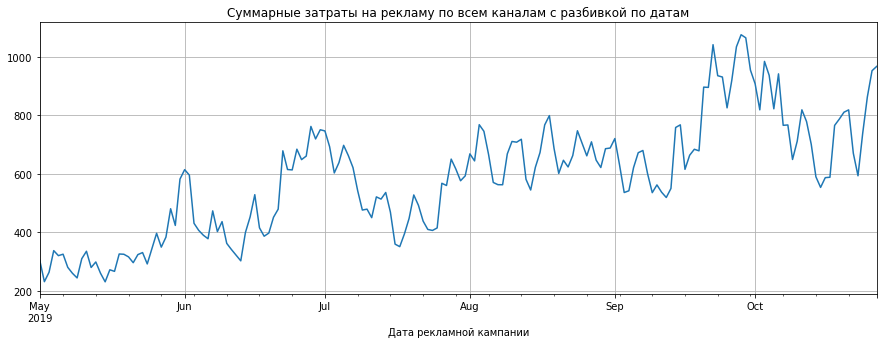

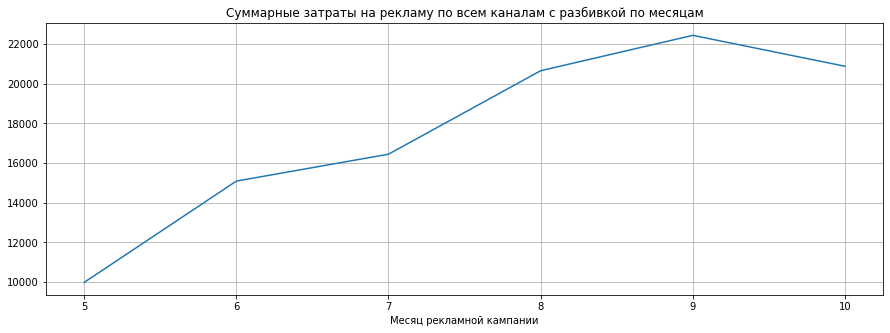

In [26]:
costs['all_users'] = 'All users'

costs.pivot_table(index='all_users', columns='dt', values='costs', aggfunc='sum').T.plot(grid=True, figsize=(15, 5), 
                                                                                         legend=None)
plt.xlabel('Дата рекламной кампании')
plt.title('Суммарные затраты на рекламу по всем каналам с разбивкой по датам')
plt.show()

costs['month_f_ts'] = costs['dt'].dt.month
costs.pivot_table(index='all_users', columns='month_f_ts', values='costs', aggfunc='sum').T.plot(grid=True, figsize=(15, 5), 
                                                                                               legend=None)
plt.xlabel('Месяц рекламной кампании')
plt.title('Суммарные затраты на рекламу по всем каналам с разбивкой по месяцам')
plt.show()

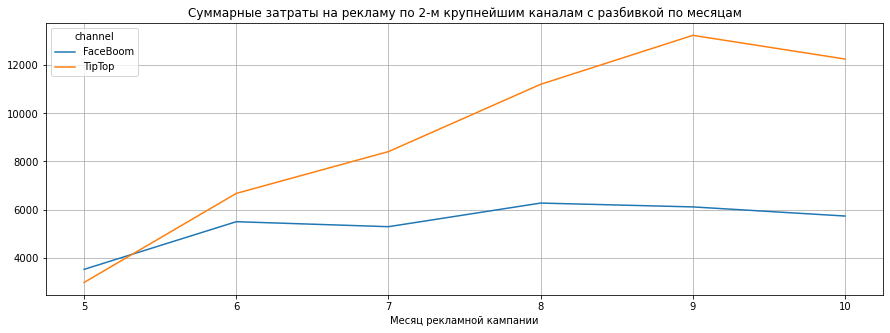

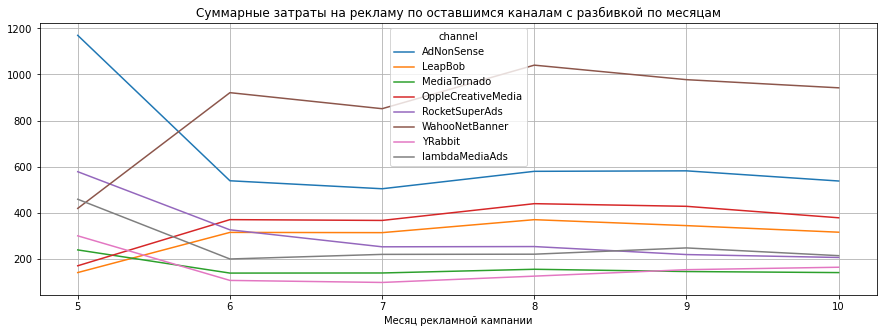

In [27]:
costs.query('(channel == "TipTop") | (channel == "FaceBoom")').pivot_table(index='channel', columns='month_f_ts', values='costs',
                                                                           aggfunc='sum').T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Месяц рекламной кампании')
plt.title('Суммарные затраты на рекламу по 2-м крупнейшим каналам с разбивкой по месяцам')
plt.show()

costs.query('(channel != "TipTop") & (channel != "FaceBoom")').pivot_table(index='channel', columns='month_f_ts', values='costs', aggfunc='sum').T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Месяц рекламной кампании')
plt.title('Суммарные затраты на рекламу по оставшимся каналам с разбивкой по месяцам')
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 4.2. Расчёт CAC. </b></font>

Привлечение одного пользователя по всему проекту стоило 1,13 (долларов?). Интересно, что самыми дорогими в плане привлечения пользователей оказались каналы с самым большим количеством привлечённых пользователей: если для FaceBoom САС составляет 1.11 (долларов?), то для самого крупного канала привлечения - TipTop - CAC заметно больше чем у конкуретнов - целых 2,8 (долларов)

<font size=+1><b> 4.3. Маркетинг: выводы. </b></font>

При анализе проведения рекламных кампаний выделены два лидирующих канала: TipTop и FaceBoom. При этом для  FaceBoom привлёк больше новых пользователей (30к) при меньшем рекламного бюджете 32445.60 (долларов?). Для TipTop эти числа соотвественно равны 20к (новых пользователей) и 54751.30 (долларов (?) рекламного бюджета. Именно эти объясняется различие в показателе САС для двух каналов 1.11 (что всё равно больше у других более мелких каналов) против 2,8 (намного больше чем у всех остальных каналов).
    
<div>

In [28]:
costs['first_ts'] = costs['dt']

cac = get_cac(first_sessions, costs, 'channel')

print('Привлечение одного пользователя по всему проекту:', round(cac['costs'].sum() / cac['user_id'].sum(), 2))
display(cac.sort_values('cac'))

Привлечение одного пользователя по всему проекту: 1.13


,costs,user_id,cac
channel,,,
LeapBob,1797.60,8553,0.21
MediaTornado,954.48,4364,0.22
YRabbit,944.22,4312,0.22
OppleCreativeMedia,2151.25,8605,0.25
RocketSuperAds,1833.00,4448,0.41
WahooNetBanner,5151.00,8553,0.60
lambdaMediaAds,1557.60,2149,0.72
AdNonSense,3911.25,3880,1.01
FaceBoom,32445.60,29144,1.11


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+2><b> 5. АНАЛИЗ ОКУПАЕМОСТИ РЕКЛАМЫ. </b></font>

Подготовим для начала на основании датасета orders датасет conversion_raw чтобы рассчитать некоторые показатели.
    
<div>

In [29]:
conversion_raw = orders.merge(first_sessions, how='left', on='user_id')
conversion_raw = conversion_raw.rename(columns={'first_visit_channel': 'channel', 'first_device': 'device'})
conversion_raw['month_f_ts'] = conversion_raw['first_ts'].dt.month
conversion_raw['week_f_ts'] = conversion_raw['first_ts'].dt.isocalendar().week
conversion_raw['first_ts'] = conversion_raw['first_ts'].dt.date
conversion_raw['first_ts'] = pd.to_datetime(conversion_raw['first_ts'])
conversion_raw['all_users'] = 'All users'

conversion_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40212 entries, 0 to 40211
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             40212 non-null  object        
 1   event_dt            40212 non-null  datetime64[ns]
 2   revenue             40212 non-null  float64       
 3   first_ts            40212 non-null  datetime64[ns]
 4   channel             40212 non-null  object        
 5   first_visit_region  40212 non-null  object        
 6   device              40212 non-null  object        
 7   month_f_ts          40212 non-null  int64         
 8   week_f_ts           40212 non-null  UInt32        
 9   all_users           40212 non-null  object        
dtypes: UInt32(1), datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 3.3+ MB


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 5.1. Общая окупаемость рекламы. </b></font>

В этом пункте и далее самой поздней границей временного отрезка будет не 1.11.2019, а 27.10.2019, так именно в эту дату выше зафиксирована самое позднее "первое посещение". Органический траффик учитываться не будет так как его нельзя учесть (и, следовательно, сравнить с другими источниками) при расчёте ROI и CAC. Кроме того, органическим траффиком нельзя манипулировать посредством рекламных кампаний (по определению); непонятно, как увеличить значения RR, CR, LTV для этого канала привлечения.

Из общих графиков ниже можно заметить следующее (на всех моментах лайфтаймов): общий LTV и ROI, как это и должно быть, растёт; общий LTV максимален для первых недель периода анализа (тогда, как мы помним, была наибольшая эффективность мельких каналов привлечения и наименьшая - двух крупнейших каналов), более-менее постоянен на большей части периода анализа и снижается к его концу. С параметрами CAC и ROI ситуация вызывает больший интерес: ROI явно падает, CAC - растёт. Отметим эти моменты для дальнейшего анализа.
    
<div>

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3920924181.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_raw['lifetime'] = (l_raw['event_dt'] - l_raw['first_ts']).dt.days


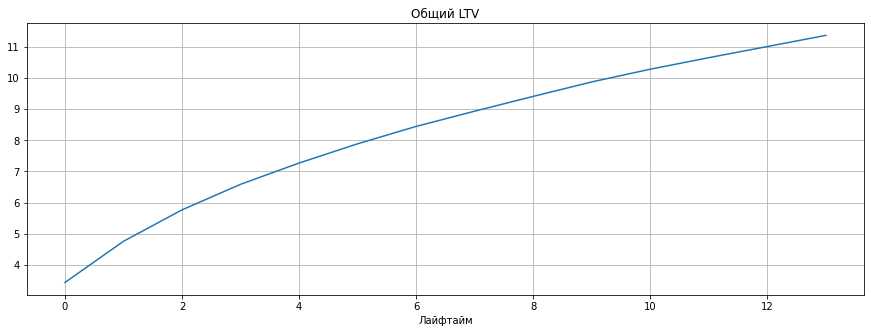

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3869375863.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_raw['lifetime'] = (roi_raw['event_dt'] - roi_raw['first_ts']).dt.days


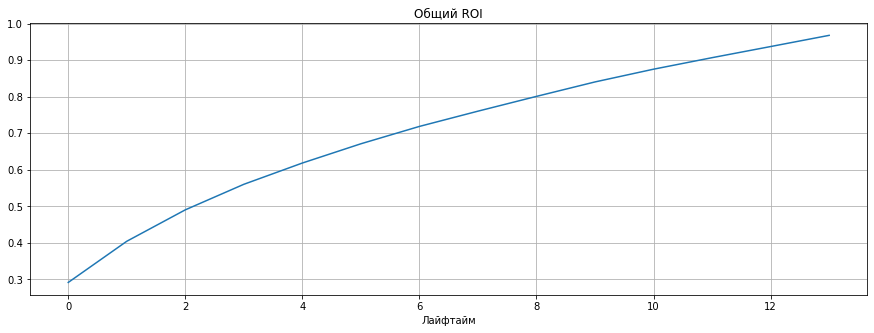

In [30]:
total_ltv = get_ltv(conversion_raw, latest_date, 14, ['all_users'])

total_ltv.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(15, 5), legend=None)
plt.xlabel('Лайфтайм')
plt.title('Общий LTV')
plt.show()

total_roi = get_roi(conversion_raw, costs, latest_date, 14, ['all_users'])

total_roi.T.plot(grid=True, figsize=(15, 5), legend=None)
plt.xlabel('Лайфтайм')
plt.title('Общий ROI')
plt.show()

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3920924181.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_raw['lifetime'] = (l_raw['event_dt'] - l_raw['first_ts']).dt.days


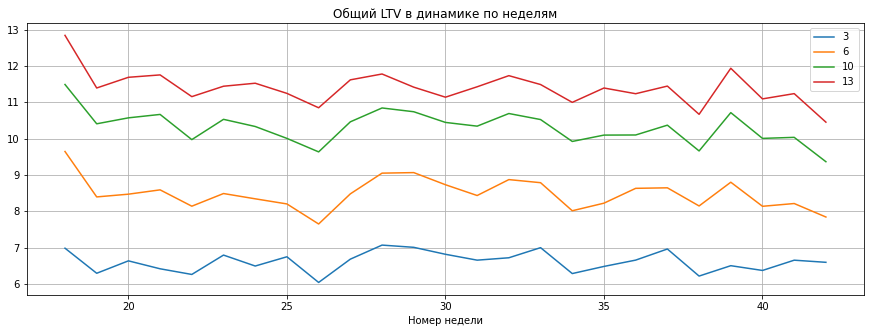

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3869375863.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_raw['lifetime'] = (roi_raw['event_dt'] - roi_raw['first_ts']).dt.days


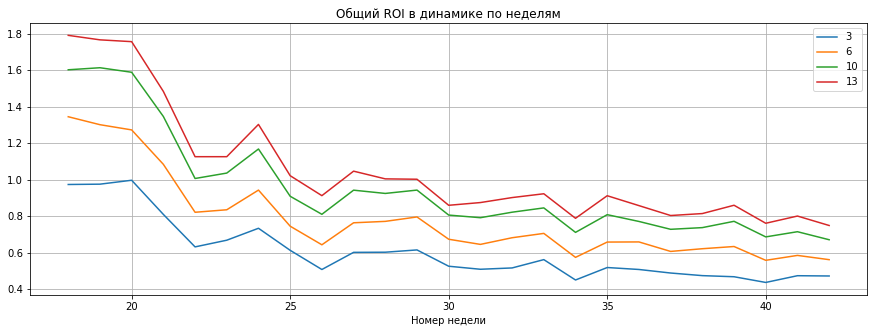

In [31]:
ltv_in_time = get_ltv(conversion_raw, latest_date, 14, ['week_f_ts'])
ltv_in_time[[3, 6, 10, 13]].plot(grid=True, figsize=(15, 5))
plt.xlabel('Номер недели')
plt.title('Общий LTV в динамике по неделям')
plt.show()

costs['week_f_ts'] = costs['dt'].dt.isocalendar().week
roi_in_time = get_roi(conversion_raw, costs, latest_date, 14, ['week_f_ts'])
roi_in_time[[3, 6, 10, 13]].plot(grid=True, figsize=(15, 5))
plt.xlabel('Номер недели')
plt.title('Общий ROI в динамике по неделям')
plt.show()

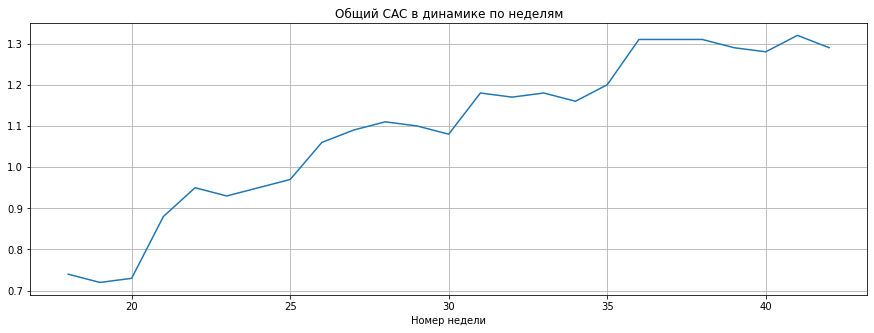

In [32]:
first_sessions['week_f_ts'] = first_sessions['first_ts'].dt.isocalendar().week
    
cac_in_time = get_cac(first_sessions, costs, 'week_f_ts', latest_date, 14, True)
cac_in_time['cac'].plot(grid=True, figsize=(15, 5))
plt.xlabel('Номер недели')
plt.title('Общий CAC в динамике по неделям')
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 5.2. Окупаемость рекламы с разбивкой по рекламным каналам. </b></font>

Два канала привлечения демонстрируют слабые показатели LTV:  'FaceBoom'   и 'AdNonSense'. При этом для них на 0-м лайфтайме показатели LTV максимальны среди других каналов, на 1-м лайфтайме – примерно одинаковы с конкурентами, а далее растут очень медленно (достигая на 13-м лайфтайме  значений в 7 и 7,5), что заметно по сравнению с оставшимися каналами (значения в диапазоне от 14 до 18 в лидирующей группе на 13-м лайфтайме).  Также  можно выделить в негативном ключе канал 'RocketSuperAds': стартуя на 0-м лайфтайме с минимальных среди каналом значений (около 2) далее LTV растёт примерно теми же темпами, что и группа с наибольшими LTV, но всё же не достигая их значений (рост остановился на значении меньшем 12). Аномалий на графиках LTV по лайфтаймам в динамике не обнаружено  (провалов до 0 / резкого роста не наблюдается, порядок графиков сохранён (линии 13-го лайфтайма всегда выше чем у 10-го и т.п.). У двух аутсайдеров по среднему LTV ('FaceBoom'   и 'AdNonSense')  были максимумы LTV в июле и июле-августе соответственно, но они всё равно намного меньше чем у конкурентов. При этом у канала 'FaceBoom', как видно ниже, сильные показатели конверсии.
    
<div>

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3920924181.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_raw['lifetime'] = (l_raw['event_dt'] - l_raw['first_ts']).dt.days


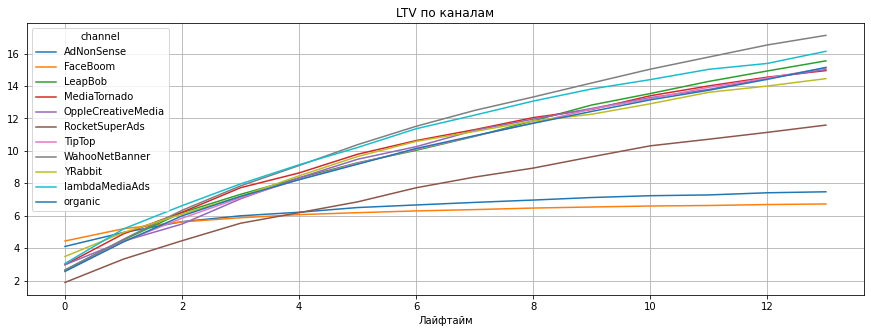

In [33]:
channel_ltv = get_ltv(conversion_raw, latest_date, 14, 'channel')

channel_ltv.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('LTV по каналам')
plt.show()

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3920924181.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_raw['lifetime'] = (l_raw['event_dt'] - l_raw['first_ts']).dt.days


LTV в динамике по месяцам по разным каналам


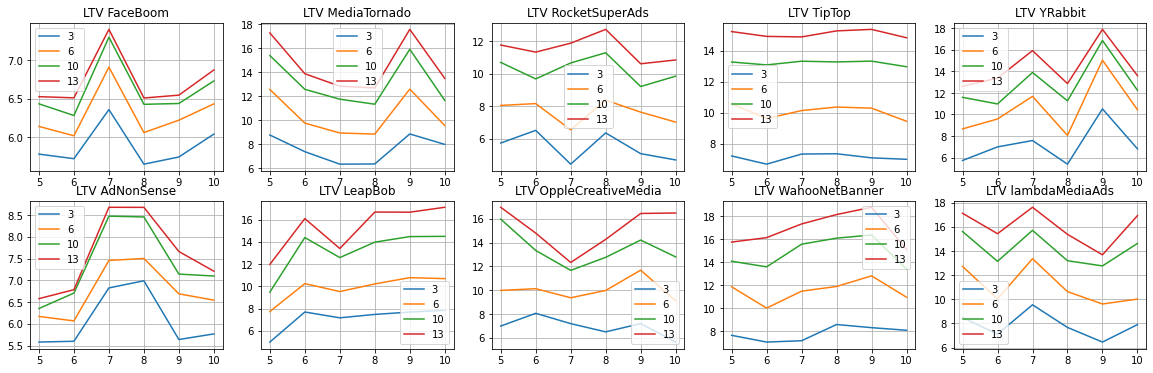

In [34]:
channel_ltv_in_time = get_ltv(conversion_raw, latest_date, 14, ['channel', 'month_f_ts'])

print('LTV в динамике по месяцам по разным каналам')

for i, ch in enumerate(costs['channel'].unique()):
    channel_ltv_in_time.query('channel == @ch')[[3, 6, 10, 13]].droplevel('channel').plot(grid=True,
                                                                            ax=plt.subplot(2, 5, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'LTV {ch}')

plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 5.2. Окупаемость рекламы с разбивкой по рекламным каналам (продолжение). </b></font>

При анализе ROI в среднем по каналам выяснено, что есть группа ROI-“аутсайдеров” ниже условного порога окупаемости в 1,0: ’TipTop’, ‘Faceboom’ и 'AdNonSense'. При этом ROI канала ’TipTop’  заметно падает в динамике по месяцам, что связано более с чем двухкратным ростом САС по месяцам. Среди других любопытных фактов отметим что  'RocketSuperAds' демонстрирует значительное падение САС, и, вследствие этого, рост ROI.
    
<div>

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3869375863.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_raw['lifetime'] = (roi_raw['event_dt'] - roi_raw['first_ts']).dt.days


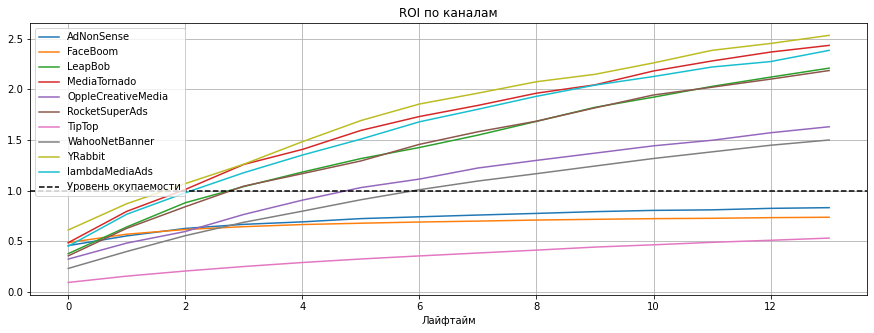

In [35]:
channel_roi = get_roi(conversion_raw, costs, latest_date, 14, 'channel')

channel_roi.T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('ROI по каналам')
plt.axhline(y=1, color='black', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3869375863.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_raw['lifetime'] = (roi_raw['event_dt'] - roi_raw['first_ts']).dt.days


ROI в динамике по месяцам по разным каналам


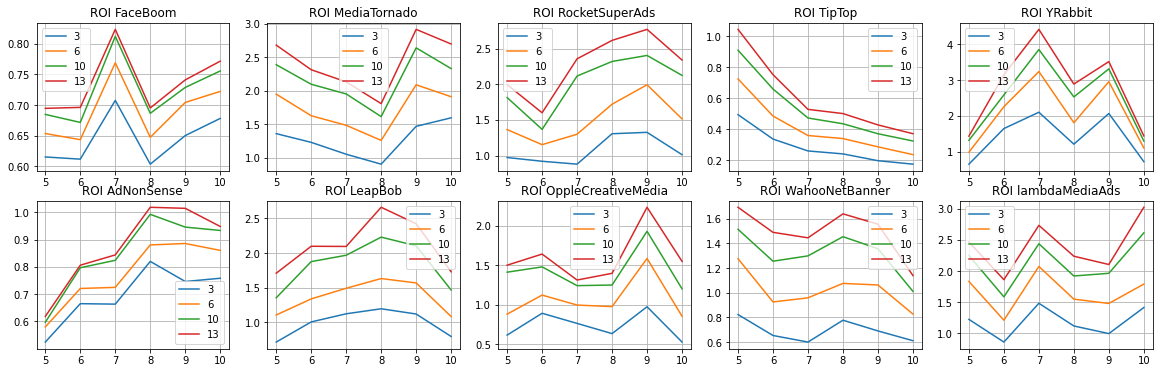

In [36]:
channel_roi_in_time = get_roi(conversion_raw, costs, latest_date, 14, ['channel', 'month_f_ts'])

print('ROI в динамике по месяцам по разным каналам')

for i, ch in enumerate(costs['channel'].unique()):
    channel_roi_in_time.query('channel == @ch')[[3, 6, 10, 13]].droplevel('channel').plot(grid=True,
                                                                            ax=plt.subplot(2, 5, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'ROI {ch}')

plt.show()

In [37]:
first_sessions['month_f_ts'] = first_sessions['first_ts'].dt.month

channel_cac_in_time = get_cac(first_sessions, costs, ['channel', 'month_f_ts'], latest_date, 14, True)

CAC в динамике по месяцам по разным каналам


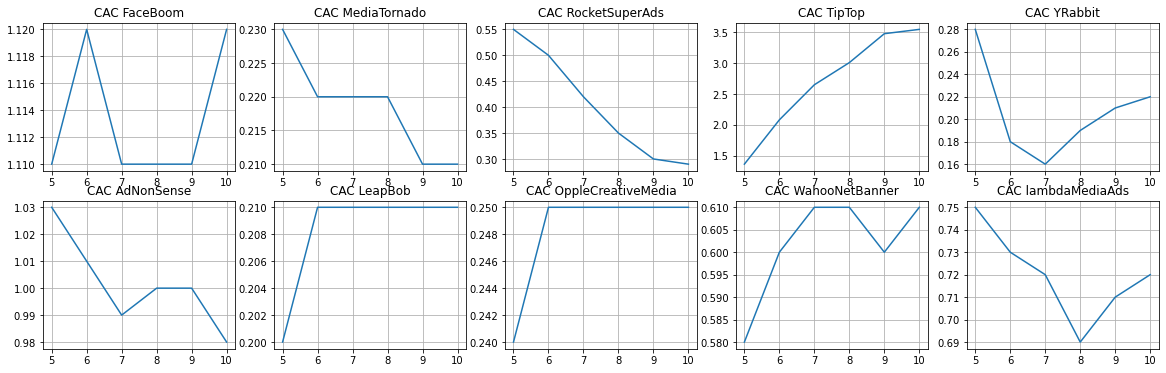

In [38]:
print('CAC в динамике по месяцам по разным каналам')

for i, ch in enumerate(costs['channel'].unique()):
    channel_cac_in_time.query('channel == @ch')['cac'].T.droplevel('channel').plot(grid=True,
                                                                            ax=plt.subplot(2, 5, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'CAC {ch}')

plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 5.2. Окупаемость рекламы с разбивкой по рекламным каналам (продолжение). </b></font>

При анализе RR каналов-«аутсайдеров» не обнаружено как в среднем, так и в динамике. В показателях CR отличия есть, они отмечены ниже при анализе проблемных каналов.
    
<div>

C:\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


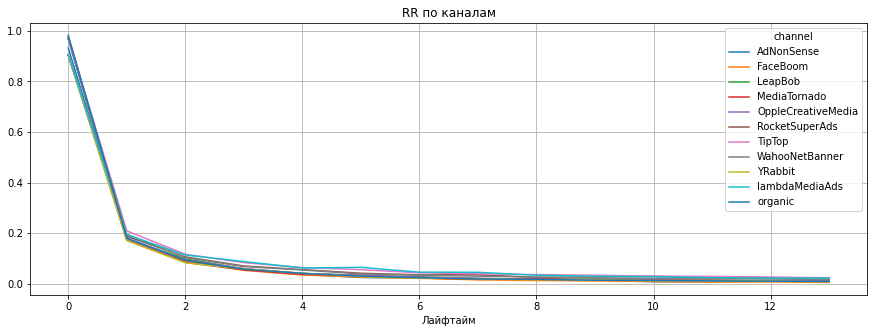

In [39]:
channel_retention = get_retention(retention_raw, latest_date, 14, 'channel')

channel_retention.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('RR по каналам')
plt.show()

C:\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


RR в динамике по месяцам по разным каналам


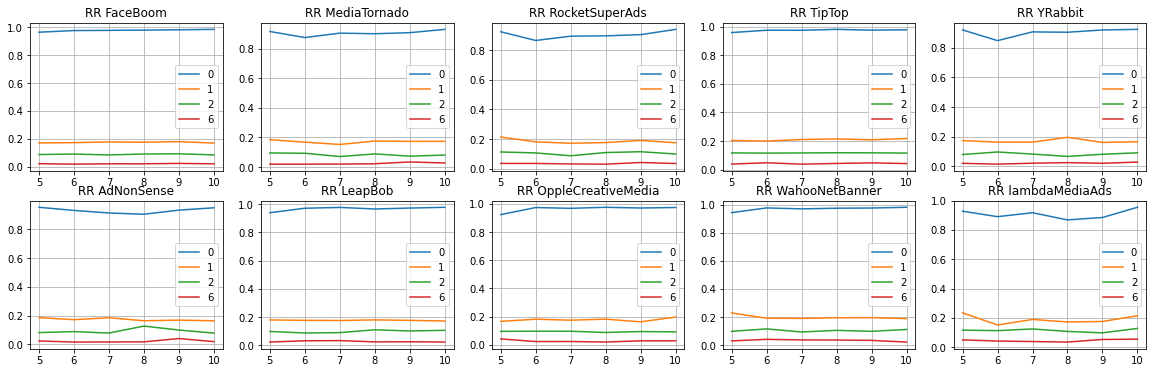

In [40]:
channel_retention_in_time = get_retention(retention_raw, latest_date, 14, ['channel', 'month_f_ts'])

print('RR в динамике по месяцам по разным каналам')

for i, ch in enumerate(costs['channel'].unique()):
    channel_retention_in_time.query('channel == @ch')[[0, 1, 2, 6]].droplevel('channel').plot(grid=True,
                                                                            ax=plt.subplot(2, 5, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'RR {ch}')

plt.show()

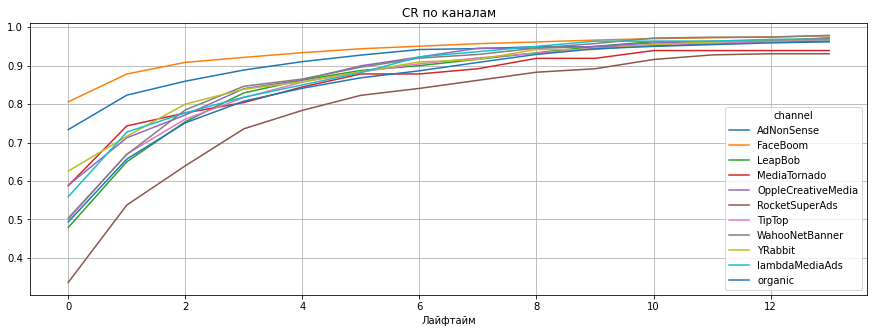

In [41]:
channel_conv = get_conversion(conversion_raw, latest_date, 14, 'channel')

channel_conv.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('CR по каналам')
plt.show()

CR в динамике по месяцам по разным каналам


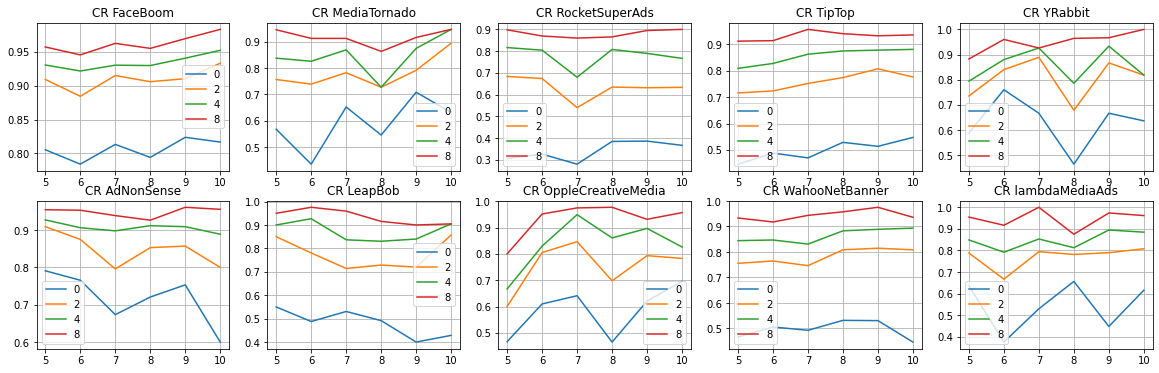

In [42]:
channel_conv_in_time = get_conversion(conversion_raw, latest_date, 14, ['channel', 'month_f_ts'])

print('CR в динамике по месяцам по разным каналам')

for i, ch in enumerate(costs['channel'].unique()):
    channel_conv_in_time.query('channel == @ch')[[0, 2, 4, 8]].droplevel('channel').plot(grid=True,
                                                                            ax=plt.subplot(2, 5, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'CR {ch}')

plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 5.2. Окупаемость рекламы с разбивкой по рекламным каналам (продолжение). </b></font>

Выводы: есть проблемы в неэффективных показателях крупнейших каналов.
- Самый большой по количеству привлеченных пользователей - ‘Faceboom’ – демонстрирует низкие показатели LTV (и соответственно, ROI) при хорошей конверсии (в т.ч. лучшей в 0-й лайфтайм). Возможная рекламная стратегия  для данного канала – стимулирование ПОВТОРНЫХ покупок пользователей (можно изучить успешный опыт июля).
- Второй (по количеству пользователей) канал ’TipTop’ имеет проблемы с высокими затратами на рекламу (показатель САС), которые ещё и растут со временем. Проблема именно в нём, так как LTV и CR стабильно высокие. Как отмечено в пункте 4.1, суммарный рекламный бюджет по данному каналу рос в динамике (разница в 6 раз между маем и октябрём), при этом количество новых пользователей увеличилось менее чем в два раза в динамике изучаемого отрезка (график ниже). Возможная рекламная стратегия  для данного канала – стимулирование количества новых пользователей по данному каналу.
- Важно несколько слов сказать о не самом большом канале ‘AdNonSense’, так как он работает на европейскую аудиторию (сводная таблица ниже). Показатель LTV данного канала не самый большой; это сказывается на размере ROI ниже формальной окупаемости. Однако, здесь есть тенденция к росту ROI. Возможная рекламная стратегия  для данного канала – стимулирование ПОВТОРНЫХ покупок пользователей (можно учесть положительный опыт кампаний июля и августа) и, возможно, увеличение конверсии 0-го лайфтайма (там есть негативная тенденция в динамике).
- Также можно отметить не самый большой LTV у канала ‘RocketSuperAds’, но эта не самая приоритетная задача учитывая малый размер привлеченной аудитории и позитивную тенденцию к уменьшению САС. Возможная рекламная стратегия  для данного канала – увеличение конверсии (она минимальна среди конкуретнов).
    
<div>

Новые пользователи, пришедшие по каналу TipTop


<AxesSubplot:xlabel='Месяцы кампаний'>

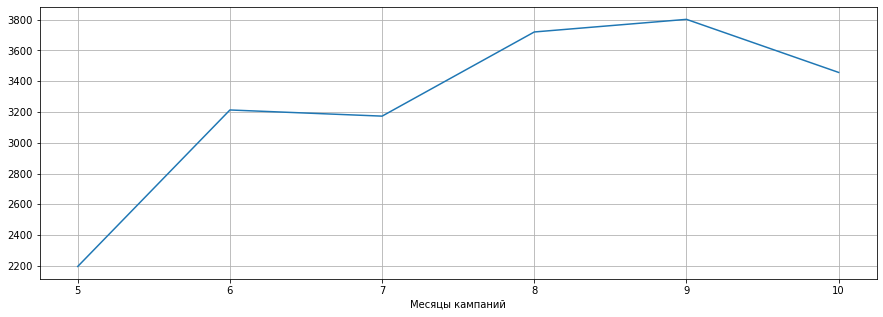

In [43]:
print('Новые пользователи, пришедшие по каналу TipTop')
first_sessions.query('first_visit_channel == "TipTop"').groupby('month_f_ts').agg({'user_id': 'nunique'}).plot(grid=True,
                                                                 figsize=(15, 5), xlabel='Месяцы кампаний', legend=False)

In [44]:
visits.query('channel == "AdNonSense" or channel == "RocketSuperAds"').groupby(['channel', 'region']).agg({'user_id': 'nunique'})

user_id
channel        region                
AdNonSense     France            1482
               Germany           1319
               UK                1398
RocketSuperAds United States     4988

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 5.3. Окупаемость рекламы с разбивкой по странам. </b></font>

Анализ LTV по странам показал, что данный показатель в США заметно меньше чем у трёх других стран: Великобритании, Франции, Германии (именно в таком порядке убывания показателя расположились их графики, однако, довольно близко друг от друга). Причины такого отставания США можно объяснить тем, что в этой стране (и только в ней) работают и занимают большую часть рекламного бюджета описанные в пункте 5.2 крупные, но неэффективные каналы привлечения: "FaceBoom" и "TipTop". Анализ LTV в динамике не выявил других моментов для анализа; можно лишь сказать, что в США LTV незначительно падает с самого начала, а в трёх других странах промежутки возрастнания чередуются с промежутками убывания показателя (в разные временные промежутки для разных стран).
    
<div>

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3920924181.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_raw['lifetime'] = (l_raw['event_dt'] - l_raw['first_ts']).dt.days


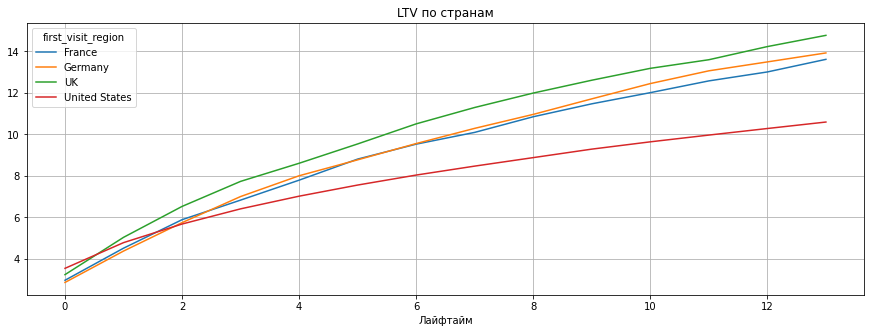

In [45]:
region_ltv = get_ltv(conversion_raw, latest_date, 14, 'first_visit_region')

region_ltv.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('LTV по странам')
plt.show()

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3920924181.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_raw['lifetime'] = (l_raw['event_dt'] - l_raw['first_ts']).dt.days


LTV в динамике по странам по разным каналам


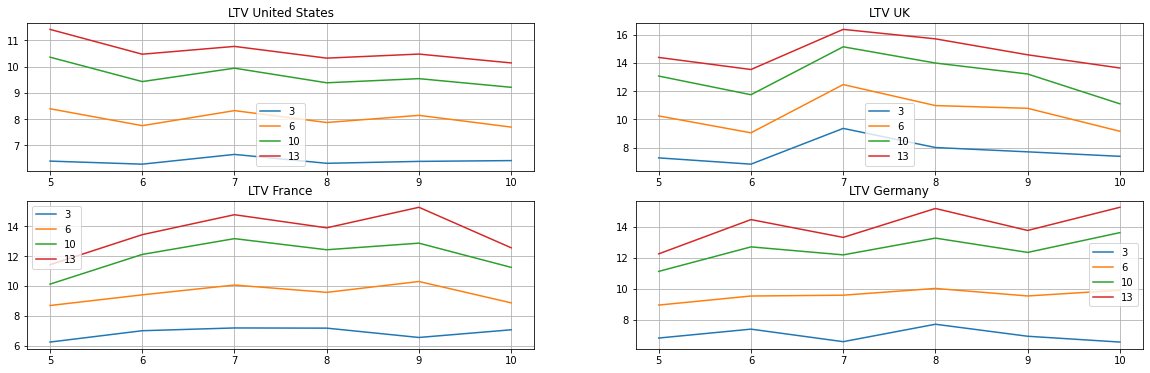

In [46]:
region_ltv_in_time = get_ltv(conversion_raw, latest_date, 14, ['first_visit_region', 'month_f_ts'])

print('LTV в динамике по странам по разным каналам')

for i, r in enumerate(visits['region'].unique()):
    region_ltv_in_time.query('first_visit_region == @r')[[3, 6, 10, 13]].droplevel('first_visit_region').plot(grid=True,
                                                                            ax=plt.subplot(2, 2, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'LTV {r}')

plt.show()

In [47]:
display(first_sessions.query('first_visit_channel == "FaceBoom" or first_visit_channel == "TipTop"').groupby(
    'first_visit_region').agg({'user_id': 'nunique'}).sort_values('user_id', ascending=False))

first_sessions.query('first_visit_region == "United States"').groupby('first_visit_channel').agg(
    {'user_id': 'nunique'}).sort_values('user_id', ascending=False)

,user_id
first_visit_region,
United States,48705


,user_id
first_visit_channel,
organic,38173
FaceBoom,29144
TipTop,19561
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 5.3. Окупаемость рекламы с разбивкой по странам (продолжение). </b></font>

Чтобы проанализировать ROI по странам придётся сгруппировать имеющиеся данные. Дело в том, что изначальный датасет costs с информацией о рекламных кампаниях имел данные только о датах, каналах и стоимости кампаний. Информации о стране там нет. Однако, каналы привлечения имеют специфику в своей работе (ниже сводная таблица): они работаю либо в Европе, либо в США. Используем это для анализа по регионам.

Учитывая данные по LTV  прошлый анализ по каналам, ROI в Европе ожидаемо выше: он выходит на условный порог окупаемости на 5-й лайфтайм, в то время как в США он его не достигает вовсе. В динамике ROI в США демонстрирует стабильное падение, в Европе - рост до сентября и падение в октябре вплоть до начальных значений.

Данные по CAC не вызывают вопросов: при стабильном LTV и описанных выше особенностях ROI логично наблюдать значительный рост CAC в США и менее значительные темпы падения САС в Европе.
    
<div>

In [48]:
first_sessions.pivot_table(index='first_visit_channel', columns='first_visit_region', values='user_id', aggfunc='nunique')

first_visit_region,France,Germany,UK,United States
first_visit_channel,,,,
AdNonSense,1366.0,1219.0,1295.0,NaN
FaceBoom,NaN,NaN,NaN,29144.0
LeapBob,2988.0,2519.0,3046.0,NaN
MediaTornado,NaN,NaN,NaN,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN
RocketSuperAds,NaN,NaN,NaN,4448.0
TipTop,NaN,NaN,NaN,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,NaN
YRabbit,NaN,NaN,NaN,4312.0


In [49]:
def get_area(column):
    column = column.replace('FaceBoom', 'USA')
    column = column.replace('TipTop', 'USA')
    column = column.replace('MediaTornado', 'USA')
    column = column.replace('RocketSuperAds', 'USA')
    column = column.replace('YRabbit', 'USA')
    column = column.replace('AdNonSense', 'EU')
    column = column.replace('LeapBob', 'EU')
    column = column.replace('OppleCreativeMedia', 'EU')
    column = column.replace('WahooNetBanner', 'EU')
    column = column.replace('lambdaMediaAds', 'EU')
    return column

conversion_raw['area'] = conversion_raw['channel']
conversion_raw['area'] = conversion_raw['area'].apply(get_area)

costs['area'] = costs['channel']
costs['area'] = costs['area'].apply(get_area)

first_sessions['area'] = first_sessions['first_visit_channel']
first_sessions['area'] = first_sessions['area'].apply(get_area)

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3869375863.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_raw['lifetime'] = (roi_raw['event_dt'] - roi_raw['first_ts']).dt.days


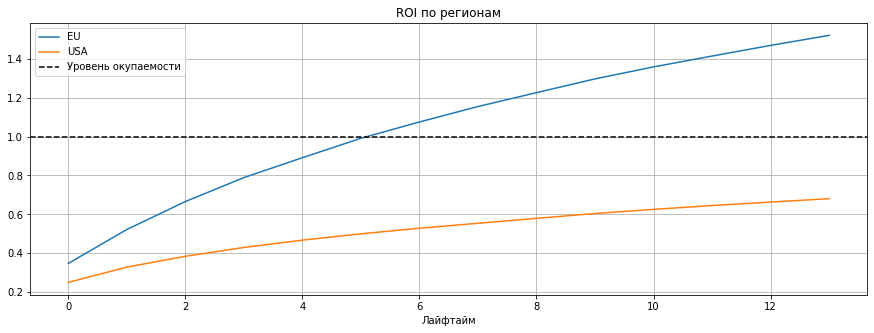

In [50]:
region_roi = get_roi(conversion_raw, costs, latest_date, 14, 'area')

region_roi.T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('ROI по регионам')
plt.axhline(y=1, color='black', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3869375863.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_raw['lifetime'] = (roi_raw['event_dt'] - roi_raw['first_ts']).dt.days


ROI в динамике по месяцам по регионам


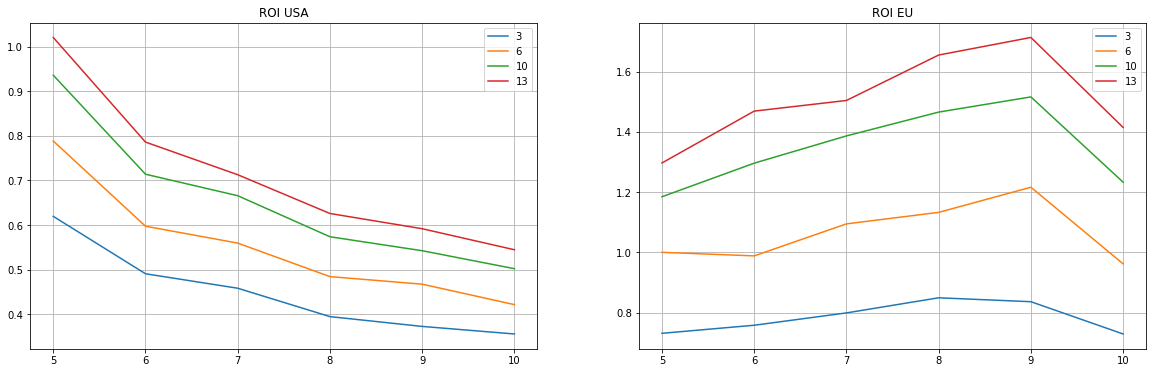

In [51]:
region_roi_in_time = get_roi(conversion_raw, costs, latest_date, 14, ['area', 'month_f_ts'])

print('ROI в динамике по месяцам по регионам')

for i, area in enumerate(costs['area'].unique()):
    region_roi_in_time.query('area == @area')[[3, 6, 10, 13]].droplevel('area').plot(grid=True,
                                                                            ax=plt.subplot(1, 2, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'ROI {area}')

plt.show()

CAC в динамике по месяцам по регионам


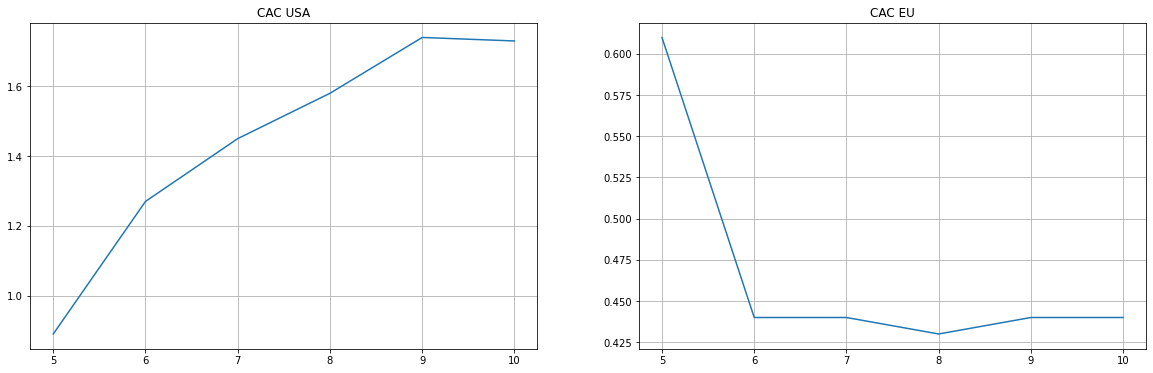

In [52]:
region_cac_in_time = get_cac(first_sessions, costs, ['area', 'month_f_ts'], latest_date, 14, True)

print('CAC в динамике по месяцам по регионам')

for i, a in enumerate(costs['area'].unique()):
    region_cac_in_time.query('area == @a')['cac'].T.droplevel('area').plot(grid=True,
                                                                            ax=plt.subplot(1, 2, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'CAC {a}')

plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 5.3. Окупаемость рекламы с разбивкой по странам (продолжение). </b></font>

Новых выводов по графикам конверсии и удержания сделать не удалось: общее удержание практически одинаково у всех стран; в динамике по месяцам заметны локальные спады или рост в разные периоды времени. Общая конверсия в первые лайфтаймы больше у США, однако к 6-му лайфтаму общая конверсия по странам практически одинакова. Разброс локальных минимумов и максимумов можно наблюдать на графиках конверсии в динамике, но я думаю что они не очень большие и наблюдаются в разные месяцы.

Выводы: LTV в США заметно меньше чем в остальных странах; кроме того, ROI пользователей из США не достигает единицы даже к концу горизонта анализа, чего не наблюдается в другом регионе. Я связываю это с тем, что два крупных и неэффективных канала привлечения новых пользователей как раза работают в этой стране.
    
<div>

C:\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


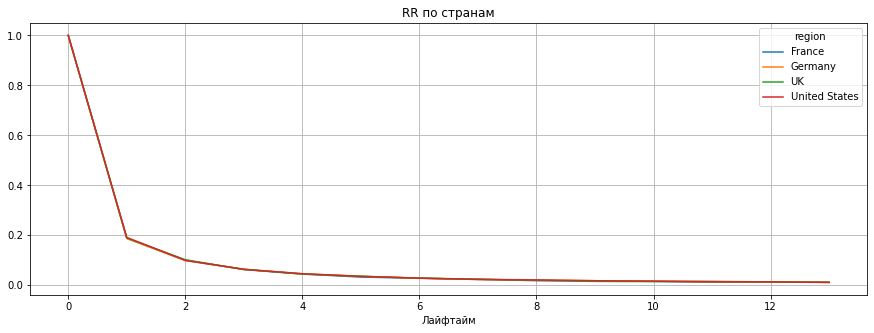

In [53]:
region_retention = get_retention(retention_raw, latest_date, 14, 'region')

region_retention.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('RR по странам')
plt.show()

C:\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


RR в динамике по месяцам по странам


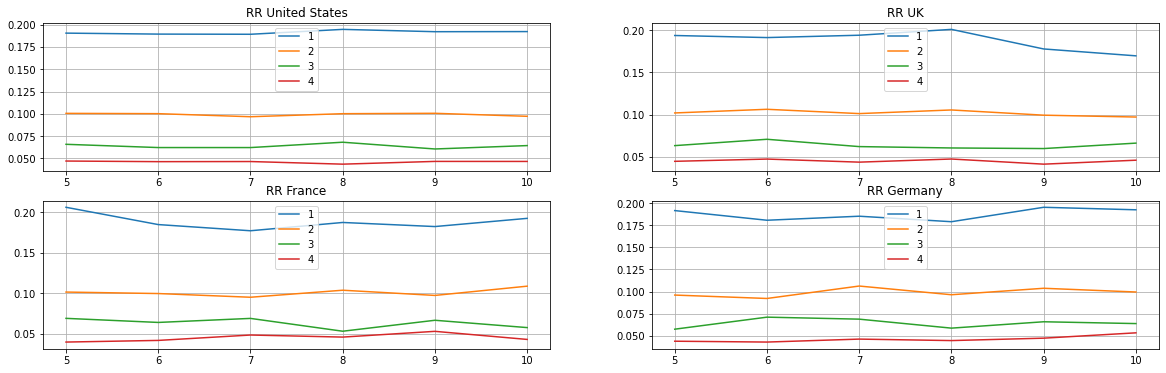

In [54]:
region_retention_in_time = get_retention(retention_raw, latest_date, 14, ['region', 'month_f_ts'])

print('RR в динамике по месяцам по странам')

for i, r in enumerate(visits['region'].unique()):
    region_retention_in_time.query('region == @r')[[1, 2, 3, 4]].droplevel('region').plot(grid=True,
                                                                            ax=plt.subplot(2, 2, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'RR {r}')

plt.show()

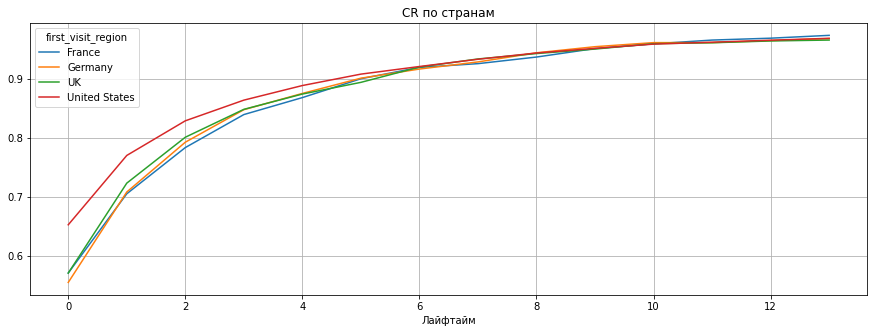

In [55]:
region_conv = get_conversion(conversion_raw, latest_date, 14, 'first_visit_region')

region_conv.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('CR по странам')
plt.show()

CR в динамике по месяцам по странам


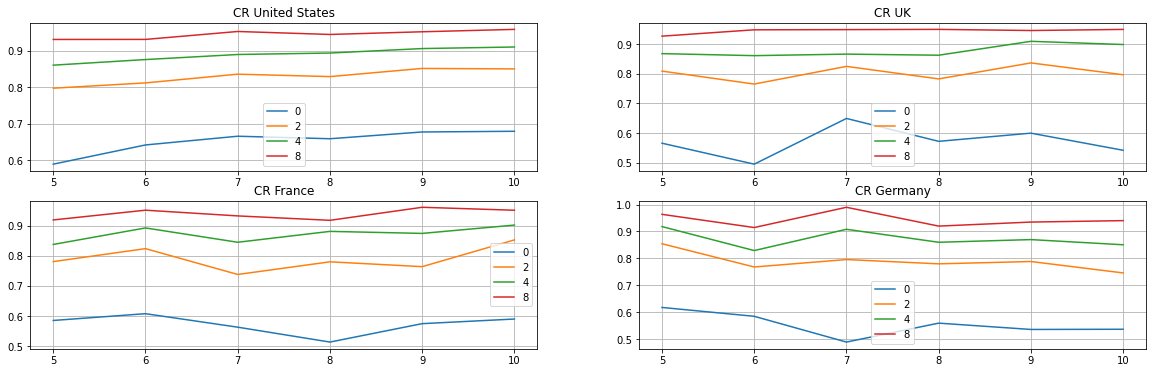

In [56]:
region_conv_in_time = get_conversion(conversion_raw, latest_date, 14, ['first_visit_region', 'month_f_ts'])

print('CR в динамике по месяцам по странам')

for i, r in enumerate(visits['region'].unique()):
    region_conv_in_time.query('first_visit_region == @r')[[0, 2, 4, 8]].droplevel('first_visit_region').plot(grid=True,
                                                                            ax=plt.subplot(2, 2, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'CR {r}')

plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+1><b> 5.4. Окупаемость рекламы с разбивкой по устройствам. </b></font>

В начале следует отметить что каналы привлечения пользователей не обладают спецификой по устройствам (это видно на сводной таблице ниже) - в отличии от разделения по регионам. Поэтому не удастья посмотреть разбивку CAC и ROI по устройствам.

Что же касается анализа других показателей, то можно отметить что у пользователей PC LTV в среднем больше чем на других трёх платформах (Android, iPhone, Mac). Однако эти отличия не так заметны как в случае с разными каналами привлечения. Заметных спадов и роста LTV в динамике не наблюдается.
    
<div>

In [57]:
first_sessions.pivot_table(index='first_visit_channel', columns='first_device', values='user_id', aggfunc='nunique')

first_device,Android,Mac,PC,iPhone
first_visit_channel,,,,
AdNonSense,1109,410,1563,798
FaceBoom,5875,7265,3008,12996
LeapBob,2580,880,3402,1691
MediaTornado,879,1105,453,1927
OppleCreativeMedia,2526,882,3496,1701
RocketSuperAds,928,1137,466,1917
TipTop,3889,4820,2012,8840
WahooNetBanner,2577,856,3409,1711
YRabbit,865,1097,482,1868


C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3920924181.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_raw['lifetime'] = (l_raw['event_dt'] - l_raw['first_ts']).dt.days


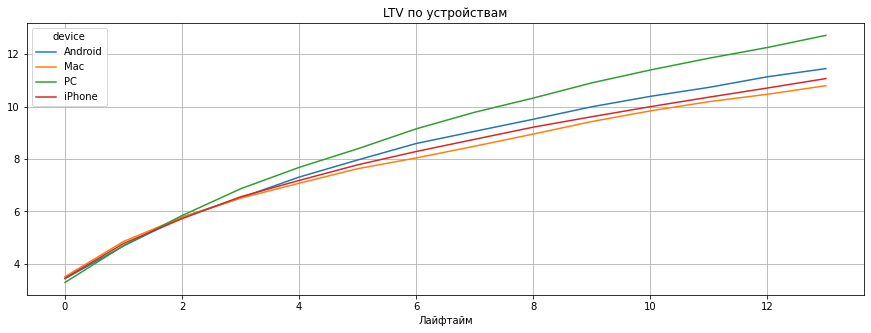

In [58]:
device_ltv = get_ltv(conversion_raw, latest_date, 14, 'device')

device_ltv.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('LTV по устройствам')
plt.show()

C:\Users\E51C~1\AppData\Local\Temp/ipykernel_19968/3920924181.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_raw['lifetime'] = (l_raw['event_dt'] - l_raw['first_ts']).dt.days


LTV в динамике по месяцам по устройствам


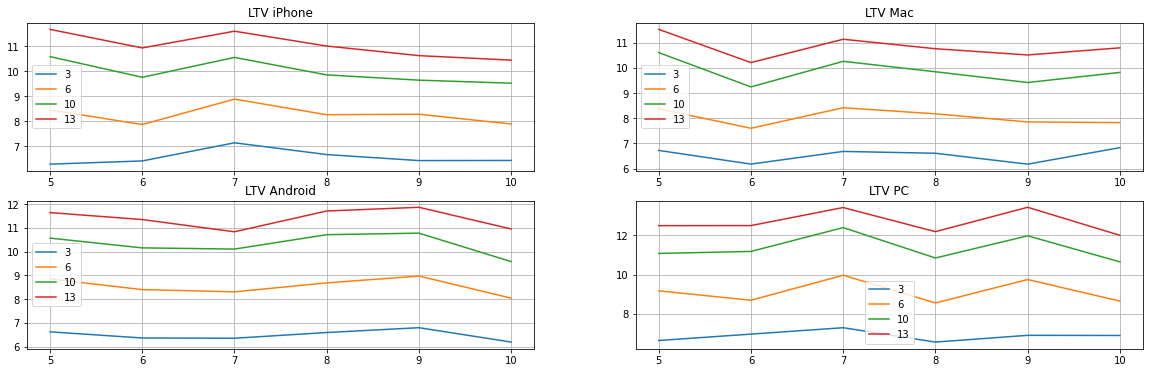

In [59]:
device_ltv_in_time = get_ltv(conversion_raw, latest_date, 14, ['device', 'month_f_ts'])

print('LTV в динамике по месяцам по устройствам')

for i, d in enumerate(visits['device'].unique()):
    device_ltv_in_time.query('device == @d')[[3, 6, 10, 13]].droplevel('device').plot(grid=True,
                                                                            ax=plt.subplot(2, 2, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'LTV {d}')

plt.show()

<font size=+1><b> 5.4. Окупаемость рекламы с разбивкой по устройствам (продолжение). </b></font>

Графики RR в разбивке по разным устройствам практически совпадают; динамика RR также довольна стабильна. Отличий в конверсии по разным устройствам также обнаружить не удалось.

C:\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


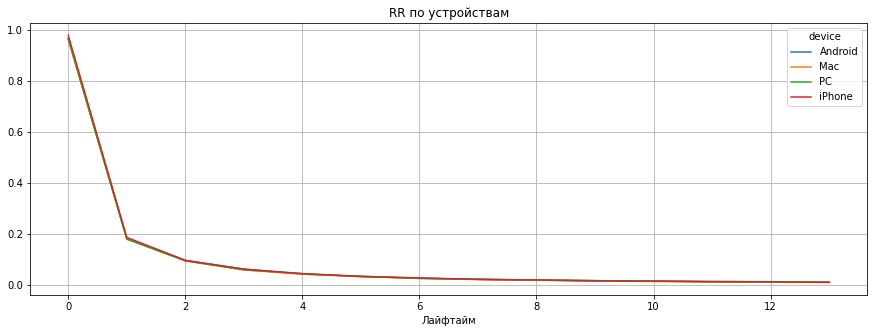

In [60]:
device_retention = get_retention(retention_raw, latest_date, 14, 'device')

device_retention.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('RR по устройствам')
plt.show()

C:\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


RR в динамике по месяцам по устройствам


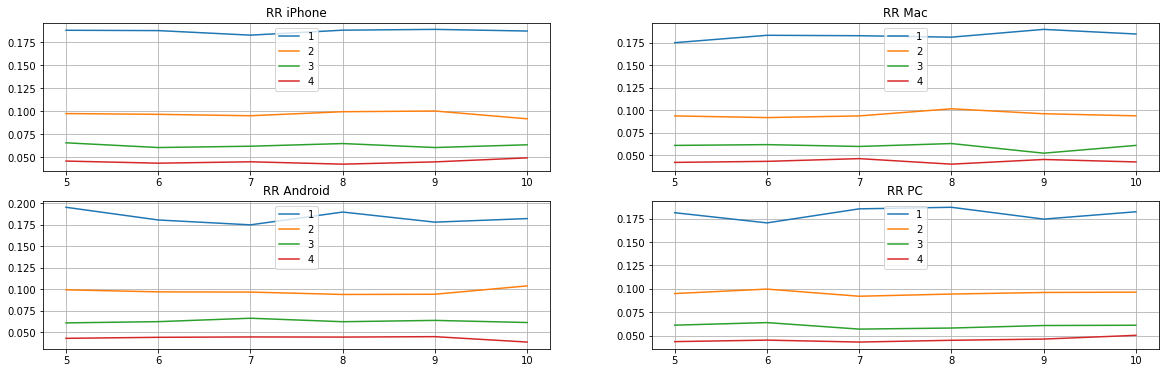

In [61]:
device_retention_in_time = get_retention(retention_raw, latest_date, 14, ['device', 'month_f_ts'])

print('RR в динамике по месяцам по устройствам')

for i, d in enumerate(visits['device'].unique()):
    device_retention_in_time.query('device == @d')[[1, 2, 3, 4]].droplevel('device').plot(grid=True,
                                                                            ax=plt.subplot(2, 2, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'RR {d}')

plt.show()

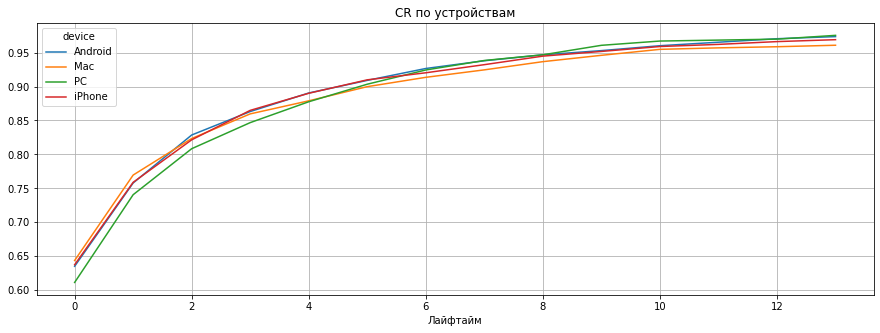

In [62]:
device_conv = get_conversion(conversion_raw, latest_date, 14, 'device')

device_conv.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('CR по устройствам')
plt.show()

CR в динамике по месяцам по устройствам


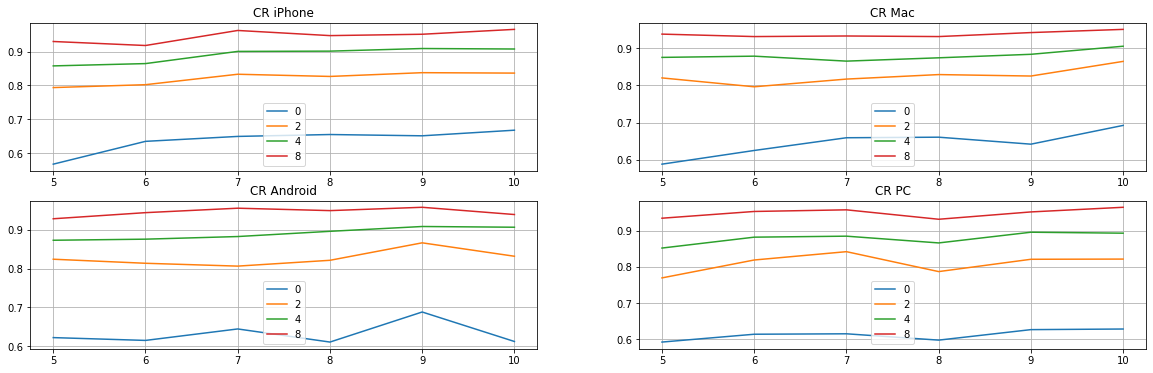

In [63]:
device_conv_in_time = get_conversion(conversion_raw, latest_date, 14, ['device', 'month_f_ts'])

print('CR в динамике по месяцам по устройствам')

for i, d in enumerate(visits['device'].unique()):
    device_conv_in_time.query('device == @d')[[0, 2, 4, 8]].droplevel('device').plot(grid=True,
                                                                            ax=plt.subplot(2, 2, i+1), figsize=(20, 6))
    plt.xlabel('')
    plt.title(f'CR {d}')

plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">

<font size=+2><b> 6. ВЫВОДЫ. </b></font>

В целом нельзя сказать что реклама окупается; это видно по общему графику ROI и в разбивке этого показателя по разным параметрам. Главное, что снижает окупаемость рекламы, - это неэффективная деятельность двух крупнейших каналов привлечения 'FaceBoom' и 'TipTop', работающих с аудиторией США. Для решения этой проблемы можно изучить возможность масштабировать рекламные кампании по другим более успешным (но привлекавших меньшее количество новых пользователей в рассмотренный период пользователей) каналам, увеличив их долю. Этот вопрос также следует изучить если планируется больший охват аудитории в Европе, который сейчас значительно меньше. Если это невозможно, то следует изменить рекламные стратегии для проблемных 'FaceBoom' и 'TipTop'.

В первом случае можно отметить низкий LTV привлеченных пользователей, во втором - неэффектиность привлечения новых пользователей на фоне возрастающих затрат на привлечение. В случае канала 'FaceBoom' (а также менее крупного канала ‘AdNonSense’) следует простимулировать привлеченных пользователей на повторные покупки. В случае 'TipTop' проблема в привлечении новых пользователей: рекламная кампания была значительно промасштабирована во времени, но нужного эффекта ей достигнуть не удалось.

Серьезных отличий в поведении пользователей разных устройств не обнаружено.
    
<div>